<AxesSubplot:xlabel='Url', ylabel='Retweets'>

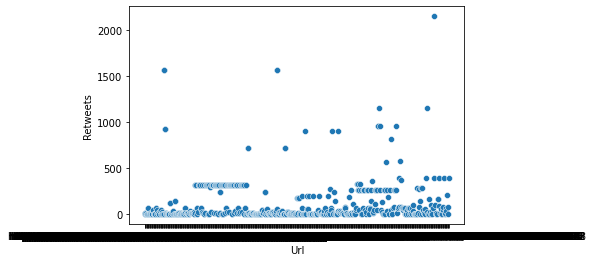

In [1]:
import seaborn
import pandas as pd
from lithops import Storage
from io import BytesIO
bucket='cloudbuttonhackathon'

storage=Storage()
data=storage.get_object(bucket,"tweets.csv")
df = pd.read_csv(BytesIO(data))
seaborn.scatterplot(x="Url", y="Retweets", data=df)

2021-06-15 10:31:46,431 [INFO] lithops.config -- Lithops v2.3.3
2021-06-15 10:31:46,442 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: us-south
2021-06-15 10:31:46,443 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: us-south - Namespace: adria.torija@estudiants.urv.cat_dev
2021-06-15 10:31:46,443 [INFO] lithops.executors -- Serverless Executor created with ID: a5c3b3-0
2021-06-15 10:31:46,444 [INFO] lithops.invokers -- ExecutorID a5c3b3-0 | JobID M000 - Selected Runtime: hatori9/dockersd:prac2sdc - 256MB
2021-06-15 10:31:46,447 [INFO] lithops.job.job -- ExecutorID a5c3b3-0 | JobID M000 - Uploading function and data - Total: 1.1KiB
2021-06-15 10:31:47,866 [INFO] lithops.invokers -- ExecutorID a5c3b3-0 | JobID M000 - Starting function invocation: None() - Total: 1 activations
2021-06-15 10:31:47,868 [INFO] lithops.invokers -- ExecutorID a5c3b3-0 | JobID M000 - View execution logs at C:\Users\Xavi\AppData\Loc

<AxesSubplot:xlabel='0', ylabel='1'>

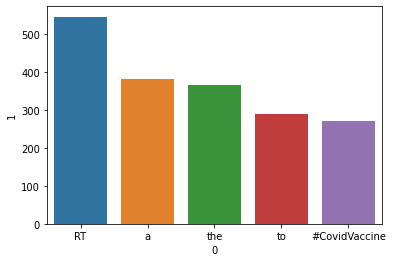

In [2]:

import seaborn
import pandas as pd
from lithops import Storage
from io import BytesIO
from lithops.multiprocessing import Pool
from collections import Counter

bucket='cloudbuttonhackathon'

#Take the N most common words
def mostCommonWords(n):
    storage=Storage()
    data=storage.get_object(bucket,"tweets.csv")
    df = pd.read_csv(BytesIO(data))
    splitText = []
    for text in df["Text"]:
        for word in str(text).split():
            splitText.append(word)
        m = Counter(splitText).most_common(n)
        print(m)
    return m

with Pool() as pool:
    mcW=pool.map(mostCommonWords,[5])

#MostCommonHashtag plot
pdmcW = pd.DataFrame(mcW[0])
seaborn.barplot(x=0, y=1, data=pdmcW)

2021-06-15 10:31:55,980 [INFO] lithops.config -- Lithops v2.3.3
2021-06-15 10:31:56,031 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: us-south
2021-06-15 10:31:56,033 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: us-south - Namespace: adria.torija@estudiants.urv.cat_dev
2021-06-15 10:31:56,033 [INFO] lithops.executors -- Serverless Executor created with ID: a5c3b3-1
2021-06-15 10:31:56,033 [INFO] lithops.invokers -- ExecutorID a5c3b3-1 | JobID M000 - Selected Runtime: hatori9/dockersd:prac2sdc - 256MB
2021-06-15 10:31:56,035 [INFO] lithops.job.job -- ExecutorID a5c3b3-1 | JobID M000 - Uploading function and data - Total: 1.1KiB
2021-06-15 10:31:57,191 [INFO] lithops.invokers -- ExecutorID a5c3b3-1 | JobID M000 - Starting function invocation: None() - Total: 1 activations
2021-06-15 10:31:57,192 [INFO] lithops.invokers -- ExecutorID a5c3b3-1 | JobID M000 - View execution logs at C:\Users\Xavi\AppData\Loc

<AxesSubplot:xlabel='0', ylabel='1'>

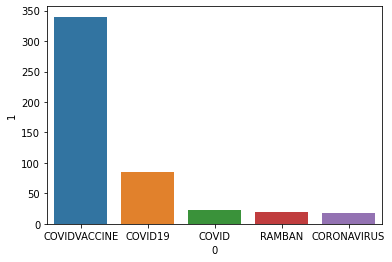

In [3]:
import seaborn
import pandas as pd
from lithops import Storage
from io import BytesIO
from lithops.multiprocessing import Pool
from collections import Counter

bucket='cloudbuttonhackathon'

#Take the N most common hashtags
def mostCommonHashtags(n):
    storage=Storage()
    data=storage.get_object(bucket,"tweets.csv")
    df = pd.read_csv(BytesIO(data))
    splitHash=[]
    for i in df["Hashtags"]:
        for word in str(i).split(','):
            if(word!='' and word!='nan'):
                splitHash.append(word.upper())
        m = Counter(splitHash).most_common(n)
    return m

with Pool() as pool:
    mcH=pool.map(mostCommonHashtags, [5])

#MostCommonHashtag plot
pdmcH = pd.DataFrame(mcH[0])
seaborn.barplot(x=0, y=1, data=pdmcH)

2021-06-15 10:32:11,899 [INFO] lithops.config -- Lithops v2.3.3
2021-06-15 10:32:11,907 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: us-south
2021-06-15 10:32:11,908 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: us-south - Namespace: adria.torija@estudiants.urv.cat_dev
2021-06-15 10:32:11,908 [INFO] lithops.executors -- Serverless Executor created with ID: a5c3b3-2
2021-06-15 10:32:11,909 [INFO] lithops.invokers -- ExecutorID a5c3b3-2 | JobID M000 - Selected Runtime: hatori9/dockersd:prac2sdc - 256MB
2021-06-15 10:32:11,912 [INFO] lithops.job.job -- ExecutorID a5c3b3-2 | JobID M000 - Uploading function and data - Total: 1022.0B
2021-06-15 10:32:13,364 [INFO] lithops.invokers -- ExecutorID a5c3b3-2 | JobID M000 - Starting function invocation: None() - Total: 1 activations
2021-06-15 10:32:13,371 [INFO] lithops.invokers -- ExecutorID a5c3b3-2 | JobID M000 - View execution logs at C:\Users\Xavi\AppData\Lo

<AxesSubplot:xlabel='0', ylabel='1'>

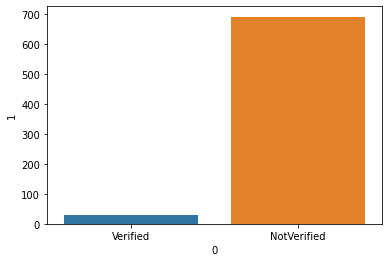

In [4]:
import seaborn
import pandas as pd
from lithops import Storage
from io import BytesIO
from lithops.multiprocessing import Pool

bucket='cloudbuttonhackathon'

#Counts how many tweets are made by veridied/not verified accounts
def verifiedTweet():
    storage=Storage()
    data=storage.get_object(bucket,"tweets.csv")
    df = pd.read_csv(BytesIO(data))
    yes = 0
    no = 0
    for verified in df["Verified"]:
        if verified:
            yes = yes +1
        else:
            no = no + 1

    dict=[yes,no]
    return dict

with Pool() as pool:
    veri=pool.starmap(verifiedTweet, [()])
#Verified plot
aux={
    "Verified":veri[0][0],
    "NotVerified":veri[0][1]
}
pdverified=pd.DataFrame(aux.items())
seaborn.barplot(x=0, y=1, data=pdverified)

2021-06-14 20:59:12,800 [INFO] lithops.config -- Lithops v2.3.3
2021-06-14 20:59:12,811 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: us-south
2021-06-14 20:59:12,812 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: us-south - Namespace: adria.torija@estudiants.urv.cat_dev
2021-06-14 20:59:12,813 [INFO] lithops.executors -- Serverless Executor created with ID: 4bca51-0
2021-06-14 20:59:12,813 [INFO] lithops.invokers -- ExecutorID 4bca51-0 | JobID M000 - Selected Runtime: hatori9/dockersd:prac2sdc - 256MB
2021-06-14 20:59:12,816 [INFO] lithops.job.job -- ExecutorID 4bca51-0 | JobID M000 - Uploading function and data - Total: 1.2KiB
2021-06-14 20:59:14,121 [INFO] lithops.invokers -- ExecutorID 4bca51-0 | JobID M000 - Starting function invocation: None() - Total: 1 activations
2021-06-14 20:59:14,122 [INFO] lithops.invokers -- ExecutorID 4bca51-0 | JobID M000 - View execution logs at C:\Users\Xavi\AppData\Loc

<AxesSubplot:xlabel='0', ylabel='1'>

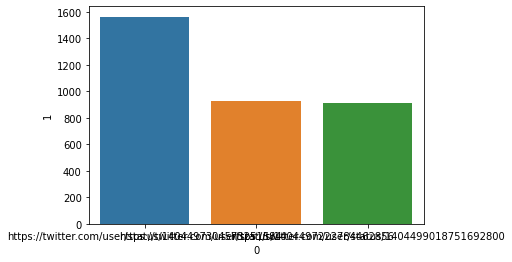

In [4]:
import seaborn
import pandas as pd
from lithops import Storage
from io import BytesIO
from lithops.multiprocessing import Pool
from heapq import nlargest
from operator import itemgetter
import datetime

bucket='cloudbuttonhackathon'

#Take the 5 most retweeted tweets according to the day passed by parameter
def mostRetweetedInADay(date):
    storage=Storage()
    data=storage.get_object(bucket,"tweets.csv")
    df = pd.read_csv(BytesIO(data))
    url = df[df['Date']==date]['Url']

    result = nlargest(5, enumerate(df[df['Date']==date]['Retweets']), itemgetter(1))
    urlList = []
    rt = []
    for value in result:
        urlList.append(url[value[0]])
        rt.append(value[1])

    dict = [urlList, rt]

    return dict

TODAY = datetime.date.today()

with Pool() as pool:
    mrT = pool.map(mostRetweetedInADay, [str(TODAY.isoformat()])

#mostRetweetedInADay plot
mostRT={
    mrT[0][0][0]:mrT[0][1][0],
    mrT[0][0][1]:mrT[0][1][1],
    mrT[0][0][2]:mrT[0][1][2],
    mrT[0][0][3]:mrT[0][1][3],
    mrT[0][0][4]:mrT[0][1][4]
}

mostRTdf=pd.DataFrame(mostRT.items())
seaborn.barplot(x=0, y=1, data=mostRTdf)

2021-06-15 10:41:46,619 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: us-south
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Xavi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<AxesSubplot:xlabel='0', ylabel='1'>

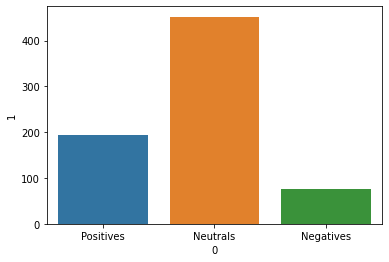

In [10]:
import seaborn
import pandas as pd
from lithops import Storage
from io import BytesIO
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from googletrans import Translator
import seaborn
import nltk

bucket='cloudbuttonhackathon'

#Sentiment analysis
def feelings():
    storage=Storage()
    data=storage.get_object(bucket,"tweets.csv")
    df = pd.read_csv(BytesIO(data))
    nltk.download('vader_lexicon')
    translator = Translator()
    analyzer = SentimentIntensityAnalyzer()
    pos, neg, neu = 0, 0, 0
    positive, neutral, negative = [], [], []
    for text in (df["Text"]):
        aux=text
        try:
            text=translator.translate(text,dest="en").text
        except:
            text=aux
        vs = analyzer.polarity_scores(str(text))
    #polary = analyzer.polarity_scores()
        if vs['compound'] >= 0.4:
            pos += 1
            if (text) not in positive:
                positive.append(text)
        elif vs['compound'] < 0.4 and vs['compound'] > -0.4:
            neu += 1
            if (text) not in neutral:
                neutral.append((text))
        else:
            neg += 1
            if (text) not in negative:
                negative.append(text)
    dict=[pos,neu,neg]

    return dict

feel = feelings()
aux={
    "Positives":feel[0],
    "Neutrals":feel[1],
    "Negatives":feel[2],        
}
feel=pd.DataFrame(aux.items())
seaborn.barplot(x=0, y=1, data=feel)